In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd '/content/drive/My Drive/IEEE BigMM/IEEE-BigMM'
# %ls
# %cd 'Code/'

In [1]:
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("final_dataset.csv")
df.head(20)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,Mother Nature’s #MeToo https://t.co/nN3hbEHz85\n,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption - no:2\n,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption - no:2\n,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


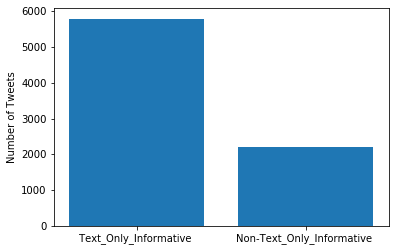

In [6]:
#Visualization
sarcastic=0
for i in range(len(df["Text_Only_Informative"])):
    if df["Text_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Text_Only_Informative"])-sarcastic
label_values={"Text_Only_Informative " : sarcastic, "Non-Text_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

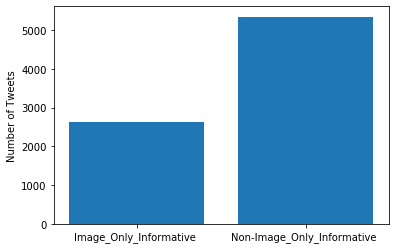

In [7]:
#Visualization
sarcastic=0
for i in range(len(df["Image_Only_Informative"])):
    if df["Image_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Image_Only_Informative"])-sarcastic
label_values={"Image_Only_Informative " : sarcastic, "Non-Image_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

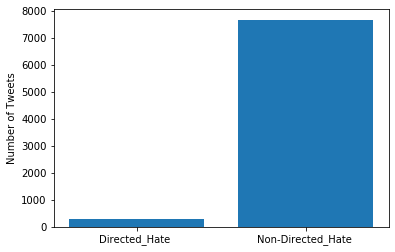

In [8]:
#Visualization
sarcastic=0
for i in range(len(df["Directed_Hate"])):
    if df["Directed_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Directed_Hate"])-sarcastic
label_values={"Directed_Hate " : sarcastic, "Non-Directed_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

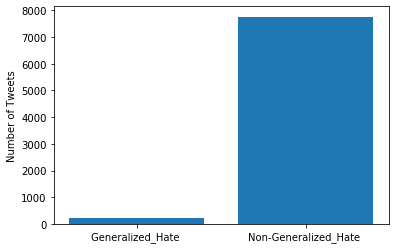

In [9]:
#Visualization
sarcastic=0
for i in range(len(df["Generalized_Hate"])):
    if df["Generalized_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Generalized_Hate"])-sarcastic
label_values={"Generalized_Hate " : sarcastic, "Non-Generalized_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

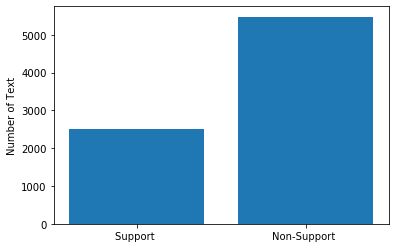

Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points


In [10]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Text")
plt.show()

print ("Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points")

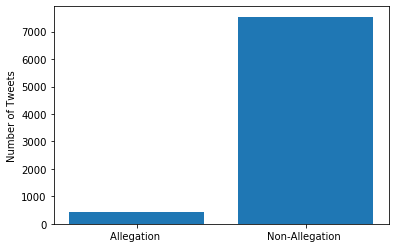

Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.
BiLSTM giving 97.65 aacuracy


In [11]:
#Visualization
sarcastic=0
for i in range(len(df["Allegation"])):
    if df["Allegation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Allegation"])-sarcastic
label_values={"Allegation " : sarcastic, "Non-Allegation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

print ("Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.")
print ("BiLSTM giving 97.65 aacuracy")

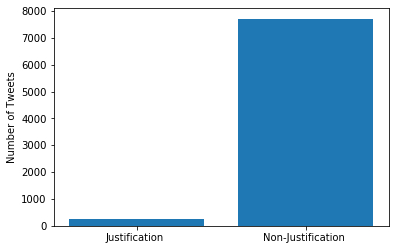

In [16]:
#Visualization
sarcastic=0
#sarcastic is just a variable to keep count of class 1
for i in range(len(df["Justification"])):
    if df["Justification"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Justification"])-sarcastic
label_values={"Justification " : sarcastic, "Non-Justification " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

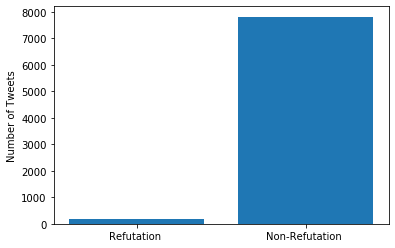

In [17]:
#Visualization
sarcastic=0
for i in range(len(df["Refutation"])):
    if df["Refutation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Refutation"])-sarcastic
label_values={"Refutation " : sarcastic, "Non-Refutation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

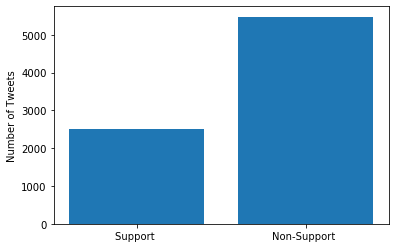

In [18]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

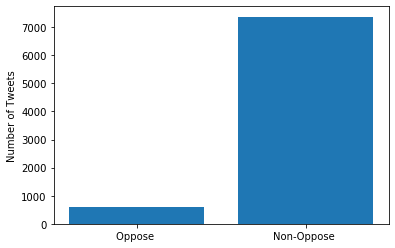

In [19]:
#Visualization
sarcastic=0
for i in range(len(df["Oppose"])):
    if df["Oppose"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Oppose"])-sarcastic
label_values={"Oppose " : sarcastic, "Non-Oppose " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

In [20]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\n', ' ', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/home/soham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/home/soham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,Mother Nature’s #MeToo https://t.co/nN3hbEHz85,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption - no:2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption - no:2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [23]:
for i,tweet in enumerate(df.text):
    #Remove hyperlinks
    #Removing links from all tweets gathered from scraping the data
    temp = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', tweet)
    df.text[i] = temp

/home/soham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
df.head(10)
#Text be moving even though checkpoint is reached 

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,Mother Nature’s #MeToo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption - no:2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption - no:2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,Meredith’s #MeToo moment on #TheOffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [25]:
(string.punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
line = "1234567 7852853427.111 https://en.wikipedia.org/wiki/Dictionary_(disambiguation)"

In [27]:
print(re.sub(r'\b\d+(?:\.\d+)?\s+', '', line))

https://en.wikipedia.org/wiki/Dictionary_(disambiguation)


In [28]:
string_punctuation2='!"#$%&\()*+-/:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in string_punctuation2])
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    return text

df['text'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,New post Domestic Violence Awareness Hasn't Ca...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,Mother Nature’s MeToo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption no2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,It is 'high time' MeToo named and shamed men i...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption no2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,Meredith’s MeToo moment on TheOffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,Interesting analysis by TheEconomist about the...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,"What a shock hey, Old Bill is in the clear amp...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [29]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

# df['text'] = df['text'].apply(lambda x: tokenization(x.lower()))
# df.head(10)

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/soham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
separator=' '
df['text'] = df['text'].apply(lambda x: separator.join(remove_stopwords(tokenization(x.lower()))))
df.head(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,new post domestic violence awareness caught me...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,domestic violence awareness caught metoo,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,mother nature metoo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption no2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,high time metoo named shamed men media adverti...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,idea persistence involves systematically igno...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption no2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,meredith metoo moment theoffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,interesting analysis theeconomist change perce...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,shock hey old bill clear amp every single imwi...,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [32]:
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# df['text'] = df['text'].apply(lambda x: stemming(x))
# df.head(10)

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/soham/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['text'] = df['text'].apply(lambda x: separator.join(lemmatizer(tokenization(x))))
# type(df['text'].apply(lambda x: lemmatizer(tokenization(x))).head(10)[0])
df.head(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1052237153789390853,new post domestic violence awareness caught me...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1052207832081129472,domestic violence awareness caught metoo,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1052183746344960000,mother nature metoo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1052156864840908800,ption no2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1052095305133510656,high time metoo named shamed men medium advert...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1052046529320640512,idea persistence involves systematically igno...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1052013663115083776,ption no2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1051986424617041920,meredith metoo moment theoffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1051983768418828288,interesting analysis theeconomist change perce...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1051939199195045890,shock hey old bill clear amp every single imwi...,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [35]:
temp = df['text']
temp2=[]
for s in temp:
    temp2+=[str(type(s))]

In [36]:
i = 0
for tmp in temp:
    if(str(type(tmp))=="<class 'float'>"):
        print(i, tmp)
    i+=1

In [37]:
import numpy as np
np.unique(temp2)

array(["<class 'str'>"], dtype='<U13')

In [38]:
df.to_csv("clean_datav5.csv")

In [39]:
%ls

 Bert_sarcasm.ipynb                     outputs/
'Bert_sarcasm-using dataset v2.ipynb'  'RoBERTa old.ipynb'
 Bert_sarcasmv2colab.ipynb              RoBERTa_stance.ipynb
 Bert_sarcasmv3colab.ipynb              runs/
 cache_dir/                             Sarcasm/
 clean_datav4.csv                       SimpleRNN.ipynb
 clean_datav5.csv                       Support_Using_ML_Classifier.ipynb
 Data_clean.ipynb                       test_data_cleanv4.csv
 dataset_integration.ipynb              test_media_links2.csv
 directed-hate-kaggle-bert-v1.ipynb     train_data_cleanv4.csv
 FetchData.ipynb                        Untitled0.ipynb
 final_dataset.csv                      Untitled9.ipynb
